Installere forskjellige pakker - fjern # for å ta inn linjen

In [62]:
# %pip install sympy

Bruker sympy

In [63]:
import sympy as sp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import eigvals
from scipy.optimize import curve_fit

## Oppgave 1A

Definerer en funksjon som tar inn funksjon, og retrunerer partiell derivert og gradienten

In [64]:
# Define symbolic variables
x, y = sp.symbols('x y')
variables = [x, y]

Definerer funskjonene

In [65]:
def F(x, y):
    return 3*x**2 + 2*x*y + 4*y**2 - 6*x - 8*y + 5

def G(x, y):
    return (x**2 + 3*y**2)**2 - 2*x*y

In [66]:
def calculate_first_derivatives(f, variables):
    derivatives = [sp.diff(f, var) for var in variables]
    return derivatives

In [67]:
def calculate_gradient(f, variables):
    return calculate_first_derivatives(f, variables)

In [68]:
def calculate_hessian_matrix(f, variables):
    hessian_matrix = sp.Matrix([[sp.diff(sp.diff(f, var1), var2) for var1 in variables] for var2 in variables])
    return hessian_matrix

In [69]:
def find_critical_points(f, variables):
    critical_points = sp.solve(calculate_gradient(f, variables), variables)
    return critical_points

In [70]:
def classify_critical_points(hessian_matrix):
    classifications = []
    for eigval in hessian_matrix.eigenvals():
        if eigval.is_real:
            if eigval > 0:
                classifications.append("Minimum")
            elif eigval < 0:
                classifications.append("Maximum")
            else:
                classifications.append("Saddle Point")
        else:
            classifications.append("Complex Eigenvalues (Saddle Point)")
    return classifications

In [71]:
# Example usage for function F
# Calculate first derivatives
first_derivatives_F = calculate_first_derivatives(F(x, y), variables)
print("First Derivatives of F:", first_derivatives_F)

# Calculate gradient
gradient_F = calculate_gradient(F(x, y), variables)
print("Gradient of F:", gradient_F)

# Calculate Hessian matrix
hessian_matrix_F = calculate_hessian_matrix(F(x, y), variables)
print("Hessian Matrix of F:", hessian_matrix_F)

# Find critical points
critical_points_F = find_critical_points(hessian_matrix_F, variables)
print("Critical Points of F:", critical_points_F)

# Classify critical points
classifications_F = classify_critical_points(hessian_matrix_F)
print("Classification of Critical Points of F:", classifications_F)

# Example usage for function G
# (Repeat the same process as above, replacing F with G)



First Derivatives of F: [6*x + 2*y - 6, 2*x + 8*y - 8]
Gradient of F: [6*x + 2*y - 6, 2*x + 8*y - 8]
Hessian Matrix of F: Matrix([[6, 2], [2, 8]])
Critical Points of F: []
Classification of Critical Points of F: ['Minimum', 'Minimum']


In [72]:
# Example usage for function F
# Calculate first derivatives
first_derivatives_G = calculate_first_derivatives(G(x, y), variables)
print("First Derivatives of G:", first_derivatives_G)

# Calculate gradient
gradient_G = calculate_gradient(G(x, y), variables)
print("Gradient of G:", gradient_G)

# Calculate Hessian matrix
hessian_matrix_G = calculate_hessian_matrix(G(x, y), variables)
print("Hessian Matrix of G:", hessian_matrix_G)

# Find critical points
critical_points_G = find_critical_points(hessian_matrix_G, variables)
print("Critical Points of G:", critical_points_G)

# Classify critical points
classifications_G = classify_critical_points(hessian_matrix_G)
print("Classification of Critical Points of G:", classifications_G)

First Derivatives of G: [4*x*(x**2 + 3*y**2) - 2*y, -2*x + 12*y*(x**2 + 3*y**2)]
Gradient of G: [4*x*(x**2 + 3*y**2) - 2*y, -2*x + 12*y*(x**2 + 3*y**2)]
Hessian Matrix of G: Matrix([[12*x**2 + 12*y**2, 24*x*y - 2], [24*x*y - 2, 12*x**2 + 108*y**2]])
Critical Points of G: {x: 0, y: 0}
Classification of Critical Points of G: ['Complex Eigenvalues (Saddle Point)', 'Complex Eigenvalues (Saddle Point)']


Forklaring

## Oppgave 2

In [73]:
data = np.array([
    [11, 7, 5, 13, 0],
    [21, 23, 10, 11, 35],
    [0, 5, 15, 20, 25],
    [12, 0, 23, 17, 13],
    [56, 65, 47, 39, 27]
])

# Define row and column labels
row_labels = ['A', 'B', 'C', 'D', 'E']
column_labels = ['m', 'n', 'o', 'p', 'other']

# Create a DataFrame
df = pd.DataFrame(data, index=row_labels, columns=column_labels)

# Create a NumPy array from the DataFrame
numpy_array = df.to_numpy()

# Print the DataFrame
print("DataFrame:")
print(df)

# Print the NumPy array
print("\nNumPy Array:")
print(numpy_array)



DataFrame:
    m   n   o   p  other
A  11   7   5  13      0
B  21  23  10  11     35
C   0   5  15  20     25
D  12   0  23  17     13
E  56  65  47  39     27

NumPy Array:
[[11  7  5 13  0]
 [21 23 10 11 35]
 [ 0  5 15 20 25]
 [12  0 23 17 13]
 [56 65 47 39 27]]


CHATGPT produserte opp matrisen, kan velge mellom numpy og dataframe

## Oppgave c

jaujau

## Oppgave 3

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [75]:
svalbard = pd.read_excel("svalbard_met.xlsx")
svalbard = svalbard.dropna()

datacleaning

In [76]:
df = svalbard.rename(columns={'Tid(norsk normaltid)': 'dato', 'Homogenisert middeltemperatur (mnd)': 'temp'})[['dato', 'temp']]

# Convert the 'dato' column to datetime
df['dato'] = pd.to_datetime(df['dato'], errors='coerce')

# Filter the DataFrame to keep rows within the specified date range
df = df[(df['dato'] >= '2010-01-01') & (df['dato'] <= '2020-12-31')]

# df_filtered now contains only rows where 'dato' is between 2010-2020
df

,dato,temp
1336,2010-01-01,-7.2
1337,2010-02-01,-10.3
1338,2010-03-01,-15.8
1339,2010-04-01,-7.7
1340,2010-05-01,0.0
...,...,...
1463,2020-08-01,7.2
1464,2020-09-01,3.2
1465,2020-10-01,-2.2
1466,2020-11-01,-2.9


## Oppgave A

For oppgave A bygger vi bare videre modellen med a4*x for trenden

In [77]:
# Original sinusoidal model (without the trend)
def original_sinusoidal_model(x, a0, a1, a2, a3):
    return a0 * np.sin(a1 * x + a2) + a3

# Extended sinusoidal model (with the trend)
def extended_sinusoidal_model(x, a0, a1, a2, a3, a4):
    return a0 * np.sin(a1 * x + a2) + a3 + a4 * x

In [81]:
df['dato'] = pd.to_datetime(df['dato'])
# Calculate the elapsed time in months (or any other suitable unit)
reference_date = df['dato'].min()  # Use the earliest date as a reference
df['elapsed_time'] = (df['dato'] - reference_date).dt.days / 30  # Assuming 30 days per month

In [83]:
x_data = df['elapsed_time'].values
y_data = df['temp'].values

In [84]:
print (x_data)

[  0.           1.03333333   1.96666667   3.           4.
   5.03333333   6.03333333   7.06666667   8.1          9.1
  10.13333333  11.13333333  12.16666667  13.2         14.13333333
  15.16666667  16.16666667  17.2         18.2         19.23333333
  20.26666667  21.26666667  22.3         23.3         24.33333333
  25.36666667  26.33333333  27.36666667  28.36666667  29.4
  30.4         31.43333333  32.46666667  33.46666667  34.5
  35.5         36.53333333  37.56666667  38.5         39.53333333
  40.53333333  41.56666667  42.56666667  43.6         44.63333333
  45.63333333  46.66666667  47.66666667  48.7         49.73333333
  50.66666667  51.7         52.7         53.73333333  54.73333333
  55.76666667  56.8         57.8         58.83333333  59.83333333
  60.86666667  61.9         62.83333333  63.86666667  64.86666667
  65.9         66.9         67.93333333  68.96666667  69.96666667
  71.          72.          73.03333333  74.06666667  75.03333333
  76.06666667  77.06666667  78.1       

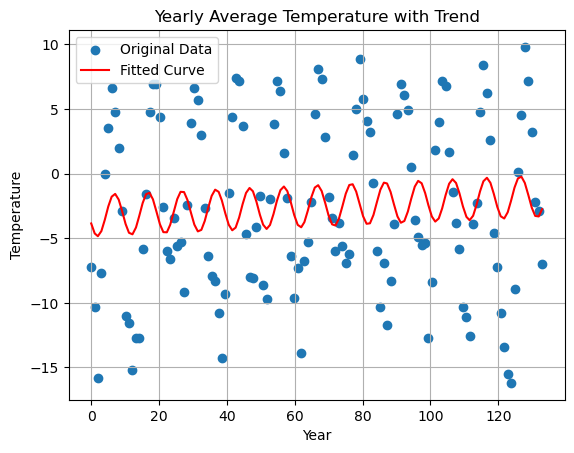

Optimized Parameters:
a0: -1.6150182521908434
a1: 0.6303415313067007
a2: 0.38375894926382165
a3: -3.2551898601349785
a4: 0.011307097564692458


In [85]:
# Initial guess for parameter values
initial_guess = [1.0, 2 * np.pi / 10, 0, np.mean(y_data), 0.1]

# Perform curve fitting using the extended model
popt, _ = curve_fit(extended_sinusoidal_model, x_data, y_data, p0=initial_guess)

# Extract the optimized parameters
a0, a1, a2, a3, a4 = popt

# Generate fitted curve using the optimized parameters
y_fit = extended_sinusoidal_model(x_data, a0, a1, a2, a3, a4)

# Plot the original data and the fitted curve
plt.scatter(x_data, y_data, label="Original Data")
plt.plot(x_data, y_fit, 'r-', label="Fitted Curve")
plt.xlabel("Year")
plt.ylabel("Temperature")
plt.legend()
plt.title("Yearly Average Temperature with Trend")
plt.grid(True)
plt.show()

# Print the optimized parameters
print("Optimized Parameters:")
print("a0:", a0)
print("a1:", a1)
print("a2:", a2)
print("a3:", a3)
print("a4:", a4)